# Understanding and Implementing Confidence Intervals

## 1. Definition and Importance

A confidence interval (CI) is a range of values, derived from sample data, that is likely to contain the value of an unknown population parameter. It is a fundamental concept in inferential statistics, allowing us to quantify the uncertainty associated with a sample estimate.

> **Example**: Instead of just providing a single number (a point estimate, like the sample mean), a confidence interval gives us a range. Rather than saying "the average height of students is 175 cm," we might say "we are 95% confident that the true average height of all students is between 172 cm and 178 cm."

### Key Components

1. **Point Estimate**
   - The best guess for the population parameter
   - Example: The sample mean (x̄) is the point estimate for the population mean (μ)

2. **Confidence Level**
   - The probability that the interval will contain the true population parameter
   - Commonly expressed as percentages: 90%, 95%, 99%
   - Example: A 95% confidence level means that if we repeat the sampling process 100 times, approximately 95 of the calculated intervals would contain the true population parameter

3. **Margin of Error**
   - The range added/subtracted from the point estimate
   - Represents the uncertainty in our estimate
   - Smaller margin = More precise estimate

### Why are they important?

Confidence intervals are crucial because they:
- Acknowledge and quantify sampling error
- Provide more realistic assessment than point estimates
- Help communicate reliability in:
  - Scientific research
  - Business analytics
  - Data analysis
  - Statistical inference

## 2. A Practical Example: Calculating a CI for a Mean

Let's work through a real-world healthcare scenario: estimating the average resting heart rate in healthy adults.

**Problem Statement:**
- Goal: Estimate the true average resting heart rate
- Challenge: Can't measure every person's heart rate
- Solution: Take a random sample of 30 adults

### Sample Data and Calculations

**Sample Data (beats per minute):**
```
[72, 68, 75, 70, 73, 65, 71, 69, 74, 67, 
 70, 72, 76, 69, 71, 68, 73, 70, 72, 66, 
 75, 71, 69, 73, 70, 74, 68, 72, 71, 69]
```

#### Goal: Calculate 95% Confidence Interval

**Formula:**
$$ CI = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}} $$

Where:
| Symbol | Meaning |
|--------|---------|
| $\bar{x}$ | Sample mean |
| $t$ | t-critical value |
| $s$ | Sample standard deviation |
| $n$ | Sample size |

#### Step-by-Step Solution:

1. **Calculate Sample Mean ($\bar{x}$)**
   - Sum all heart rates ÷ number of participants (30)
   - Result: 70.77 bpm

2. **Calculate Sample Standard Deviation ($s$)**
   - Measures data dispersion
   - Result: 2.71 bpm

3. **Sample Size ($n$)**
   - Number of participants: 30

4. **Find t-critical value ($t$)**
   - Confidence level: 95% → α = 0.05
   - Degrees of freedom: df = n - 1 = 29
   - t-critical value ≈ 2.045

5. **Calculate Standard Error of the Mean (SEM)**
   $$ SEM = \frac{s}{\sqrt{n}} = \frac{2.71}{\sqrt{30}} \approx 0.50 \text{ bpm} $$

6. **Calculate Margin of Error**
   $$ ME = t \cdot SEM = 2.045 \cdot 0.50 \approx 1.02 \text{ bpm} $$

7. **Construct the Interval**
   - Lower bound = 70.77 - 1.02 = 69.75 bpm
   - Upper bound = 70.77 + 1.02 = 71.78 bpm

#### Conclusion
We are 95% confident that the true average resting heart rate in this population lies between **69.75** and **71.78** beats per minute.

## 3. Python Implementation

In [14]:
import numpy as np
from scipy import stats

# Sample data (heart rates in beats per minute)
data = np.array([72, 68, 75, 70, 73, 65, 71, 69, 74, 67, 
                 70, 72, 76, 69, 71, 68, 73, 70, 72, 66,
                 75, 71, 69, 73, 70, 74, 68, 72, 71, 69])

# Define confidence level
confidence_level = 0.95

# Calculate sample statistics
n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation

# Calculate standard error of the mean
sem = sample_std / np.sqrt(n)

# Calculate the confidence interval using the t-distribution
# stats.t.interval(confidence_level, degrees_of_freedom, loc=sample_mean, scale=standard_error)
confidence_interval = stats.t.interval(confidence_level, 
                                     df=n-1, 
                                     loc=sample_mean, 
                                     scale=sem)

print(f"Sample Mean: {sample_mean:.2f} bpm")
print(f"Sample Standard Deviation: {sample_std:.2f} bpm")
print(f"Standard Error of the Mean: {sem:.2f} bpm")
print(f"\n{confidence_level*100}% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) bpm")

Sample Mean: 70.77 bpm
Sample Standard Deviation: 2.71 bpm
Standard Error of the Mean: 0.50 bpm

95.0% Confidence Interval: (69.75, 71.78) bpm


## 4. Visualization

Visualizing confidence intervals helps in better understanding and communicating statistical results. Let's create a bar chart with error bars that shows:

- Central bar: Mean resting heart rate
- Error bars: Margin of error
- Annotations: Exact values for mean and interval bounds

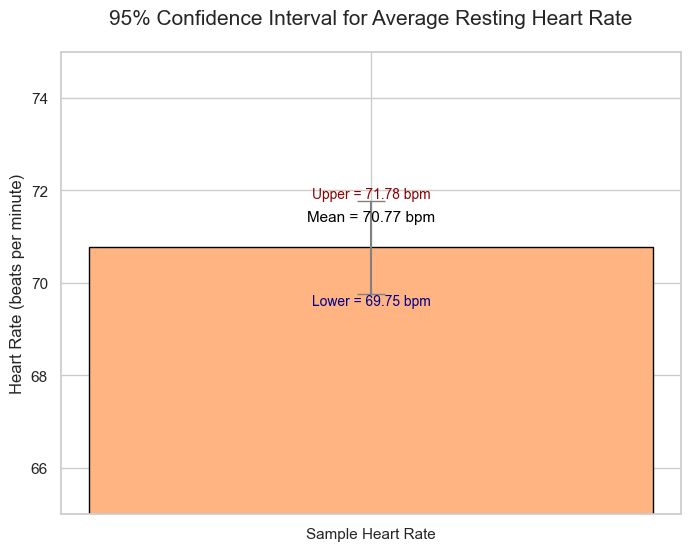

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization Setup ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate margin of error from the interval
margin_of_error = (confidence_interval[1] - confidence_interval[0]) / 2

# Create the bar plot with error bars
ax.bar('Sample Heart Rate', sample_mean, 
       yerr=margin_of_error, 
       color=sns.color_palette('pastel')[1],  # Using a different color for heart rate
       ecolor='gray',  # Error bar color
       capsize=10,     # Add caps to the error bars
       width=0.4,
       edgecolor='black')

# --- Aesthetics and Labels ---
ax.set_ylabel('Heart Rate (beats per minute)', fontsize=12)
ax.set_title('95% Confidence Interval for Average Resting Heart Rate', fontsize=15, pad=20)
ax.set_ylim(65, 75)  # Set y-axis limits to better focus on the interval

# Annotate the point estimate and the interval bounds
plt.text(0, sample_mean + 0.5, f"Mean = {sample_mean:.2f} bpm", ha='center', va='bottom', fontsize=11, color='black')
plt.text(0, confidence_interval[1], f"Upper = {confidence_interval[1]:.2f} bpm", ha='center', va='bottom', fontsize=10, color='darkred')
plt.text(0, confidence_interval[0], f"Lower = {confidence_interval[0]:.2f} bpm", ha='center', va='top', fontsize=10, color='darkblue')

plt.show()